# 題目:  Logistic Regression 進行分類，並與 polynomial regression 比較效能。
    姓名: 施宏勲
    學號: 5114029040
---

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
)
import numpy as np
import pandas as pd

# 讀取前處理後的資料
data = pd.read_csv("../../output/week7_hw_data_processing/feature_select_by_myself.csv")
X = data.drop("y", axis=1)
y = data["y"]
X.head()

,age,education,balance,housing,loan,campaign,previous,poutcome,contacted,job_blue-collar,...,job_management,job_retired,job_self-employed,job_services,job_technician,job_unemployed,marital_married,marital_single,contact_telephone,contact_unknown
0,1.606965,3.0,0.256419,1.0,0.0,-0.569351,-0.25194,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.288529,2.0,-0.437895,1.0,0.0,-0.569351,-0.25194,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,-0.747384,2.0,-0.446762,1.0,1.0,-0.569351,-0.25194,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.571051,0.0,0.047205,1.0,0.0,-0.569351,-0.25194,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.747384,0.0,-0.447091,0.0,0.0,-0.569351,-0.25194,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


### 分割資料成訓練集和測試集，評估 Logistic Regression 模型效能

In [52]:
# 分割資料成訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1000
)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)[:, 1]


Y_scores = lr.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, Y_scores)

print("FPR:", fpr)
print("TPR:", tpr)
print("Thresholds:", thresholds)

# 評估 Logistic Regression 模型效能
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print("評估 Logistic Regression 效果")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")

FPR: [0.         0.         0.         ... 0.99547852 0.99547852 1.        ]
TPR: [0.00000000e+00 9.25069380e-04 2.77520814e-03 ... 9.99074931e-01
 1.00000000e+00 1.00000000e+00]
Thresholds: [        inf  1.50100739  1.19853868 ... -4.86596522 -4.87984375
 -8.1894485 ]
評估 Logistic Regression 效果
Accuracy: 0.8915
Precision: 0.7000
Recall: 0.1619
F1-Score: 0.2630


### Plot ROC 出來，檢查效果

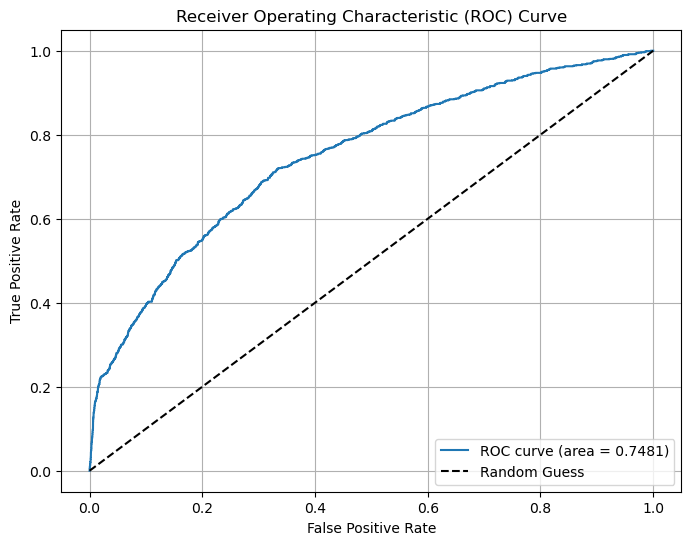

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC curve (area = %0.4f)" % auc)
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


### 多項式回歸預測與評估

In [54]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 創建多項式特徵 （如 degree=2）
pf = PolynomialFeatures(degree=2)
X_poly = pf.fit_transform(X)

# 拆分多項式特徵資料集
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y, test_size=0.2, random_state=1000)

# 建立線性回歸模型
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_poly_train)

# 多項式回歸預測與評估
y_poly_pred = poly_reg.predict(X_poly_test)
r2 = r2_score(y_poly_test, y_poly_pred)

print("\nPolynomial Regression Performance:")
print(f"R² score: {r2:.4f}")


Polynomial Regression Performance:
R² score: 0.1497
